In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import norm
import warnings

warnings.filterwarnings('ignore')

In [2]:
#Reading the data
numerical = pd.read_csv(r'files_for_lab\numerical.csv')
categorical = pd.read_csv(r'files_for_lab\categorical.csv')
target = pd.read_csv(r'files_for_lab\target.csv')


In [3]:
#Getting the shape of the data
print('Numerical')
print(numerical.shape)
print('Categorical')
print(categorical.shape)
print('Target')
print(target.shape)

Numerical
(95412, 315)
Categorical
(95412, 22)
Target
(95412, 2)


In [4]:
#Displaying the first 5 rows of the data
print('Numerical')
display(numerical.head())
print('Categorical')
display(categorical.head())
print('Target')
display(target.head())

Numerical


,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,60.000000,5,9,0,0,39,34,18,10,...,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.000000,6,9,16,0,15,55,11,6,...,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,1,61.611649,3,1,2,0,20,29,33,6,...,14,2.0,16.0,5.0,12,7.481481,15078,1,4,60
3,0,70.000000,1,4,2,0,23,14,31,3,...,7,2.0,11.0,10.0,9,6.812500,172556,1,4,41
4,0,78.000000,3,2,60,1,28,9,53,26,...,8,3.0,15.0,15.0,14,6.864865,7112,1,2,26


Categorical


,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,...,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,IL,36,H,F,3,L,E,C,T,2,...,37,12,92,8,94,2,95,12,89,11
1,CA,14,H,M,3,L,G,A,S,1,...,52,2,93,10,95,12,95,12,93,10
2,NC,43,U,M,3,L,E,C,R,2,...,0,2,91,11,92,7,95,12,90,1
3,CA,44,U,F,3,L,E,C,R,2,...,28,1,87,11,94,11,95,12,87,2
4,FL,16,H,F,3,L,F,A,S,2,...,20,1,93,10,96,1,96,1,79,3


Target


,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0


In [5]:
#Describing the data
print('Numerical')
display(numerical.describe())
print('Categorical')
display(categorical.describe())
print('Target')
display(target.describe())

Numerical


,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
count,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,...,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000
mean,54.223117,61.611649,4.134721,7.058944,3.321438,1.048443,30.445332,29.702312,32.637719,6.842326,...,5.058242,7.933656,19.999790,17.313127,8.188467,13.347786,95778.176959,0.500618,1.910053,31.534356
std,953.844476,14.450539,1.699477,2.705654,9.306899,5.065522,11.470554,15.097752,17.709065,4.391699,...,4.526651,8.784231,25.067746,13.956630,7.777089,10.769997,55284.596094,0.500002,1.072749,18.751637
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,5.000000,0.000000,0.000000,1.285714,1.000000,0.000000,1.000000,1.000000
25%,0.000000,52.000000,3.000000,5.000000,0.000000,0.000000,24.000000,20.000000,21.000000,4.000000,...,2.000000,3.000000,14.000000,10.000000,4.000000,8.384615,47910.750000,0.000000,1.000000,15.000000
50%,1.000000,61.611649,5.000000,9.000000,0.000000,0.000000,31.000000,29.000000,32.000000,6.000000,...,4.000000,5.000000,17.000000,15.000000,7.000000,11.636364,95681.500000,1.000000,2.000000,32.000000
75%,2.000000,71.000000,5.000000,9.000000,3.000000,0.000000,37.000000,39.000000,43.000000,9.000000,...,7.000000,10.000000,23.000000,20.000000,10.000000,15.477955,143643.500000,1.000000,3.000000,49.000000
max,72002.000000,98.000000,7.000000,9.000000,241.000000,99.000000,99.000000,99.000000,99.000000,99.000000,...,41.000000,1000.000000,5000.000000,1000.000000,1088.000000,1000.000000,191779.000000,1.000000,4.000000,62.000000


Categorical


,CLUSTER,DATASRCE,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
count,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000
mean,28.215717,2.604756,1.914728,91.403587,1.004601,28.818356,2.880571,92.462835,6.367511,94.349201,6.940291,95.414340,6.666373,91.295644,6.087253
std,14.393713,0.623254,0.736644,3.434549,0.199699,22.086303,3.026832,2.680042,3.895435,1.735872,3.995867,0.525012,4.240891,3.211893,3.969286
min,1.000000,1.000000,1.000000,83.000000,1.000000,0.000000,1.000000,75.000000,1.000000,75.000000,1.000000,95.000000,1.000000,0.000000,1.000000
25%,16.000000,2.000000,1.000000,88.000000,1.000000,10.000000,1.000000,91.000000,2.000000,94.000000,3.000000,95.000000,2.000000,88.000000,2.000000
50%,29.000000,3.000000,2.000000,92.000000,1.000000,28.000000,2.000000,93.000000,6.000000,95.000000,7.000000,95.000000,7.000000,92.000000,7.000000
75%,40.000000,3.000000,2.000000,95.000000,1.000000,47.000000,2.000000,95.000000,10.000000,95.000000,11.000000,96.000000,11.000000,94.000000,10.000000
max,53.000000,3.000000,4.000000,97.000000,12.000000,97.000000,12.000000,97.000000,12.000000,97.000000,12.000000,97.000000,12.000000,96.000000,12.000000


Target


,TARGET_B,TARGET_D
count,95412.000000,95412.000000
mean,0.050759,0.793073
std,0.219506,4.429725
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,200.000000


In [6]:
#Getting the data types of the columns
print('Numerical')
display(numerical.dtypes)
print('Categorical')
display(categorical.dtypes)
print('Target')
display(target.dtypes)

Numerical


TCODE         int64
AGE         float64
INCOME        int64
WEALTH1       int64
HIT           int64
             ...   
AVGGIFT     float64
CONTROLN      int64
HPHONE_D      int64
RFA_2F        int64
CLUSTER2      int64
Length: 315, dtype: object

Categorical


STATE           object
CLUSTER          int64
HOMEOWNR        object
GENDER          object
DATASRCE         int64
RFA_2R          object
RFA_2A          object
GEOCODE2        object
DOMAIN_A        object
DOMAIN_B         int64
ODATEW_YR        int64
ODATEW_MM        int64
DOB_YR           int64
DOB_MM           int64
MINRDATE_YR      int64
MINRDATE_MM      int64
MAXRDATE_YR      int64
MAXRDATE_MM      int64
LASTDATE_YR      int64
LASTDATE_MM      int64
FIRSTDATE_YR     int64
FIRSTDATE_MM     int64
dtype: object

Target


TARGET_B      int64
TARGET_D    float64
dtype: object

In [7]:
#Checking for missing values
print('Numerical')
display(numerical.isna().sum())
print('Categorical')
display(categorical.isna().sum())
print('Target')
display(target.isna().sum())

Numerical


TCODE       0
AGE         0
INCOME      0
WEALTH1     0
HIT         0
           ..
AVGGIFT     0
CONTROLN    0
HPHONE_D    0
RFA_2F      0
CLUSTER2    0
Length: 315, dtype: int64

Categorical


STATE           0
CLUSTER         0
HOMEOWNR        0
GENDER          0
DATASRCE        0
RFA_2R          0
RFA_2A          0
GEOCODE2        0
DOMAIN_A        0
DOMAIN_B        0
ODATEW_YR       0
ODATEW_MM       0
DOB_YR          0
DOB_MM          0
MINRDATE_YR     0
MINRDATE_MM     0
MAXRDATE_YR     0
MAXRDATE_MM     0
LASTDATE_YR     0
LASTDATE_MM     0
FIRSTDATE_YR    0
FIRSTDATE_MM    0
dtype: int64

Target


TARGET_B    0
TARGET_D    0
dtype: int64

In [9]:
#Dummyfying the categorical data using the columns in the categorical data and OneHotEncoding
#Importing OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

#Creating the OneHotEncoder object
encoder = OneHotEncoder(drop='first', sparse=False)

#Fitting the encoder to the categorical data
encoder.fit(categorical)

#Transforming the categorical data
categorical_encoded = encoder.transform(categorical)

#Creating a dataframe from the transformed data
categorical_encoded = pd.DataFrame(categorical_encoded)

#Concatenating the transformed data with the rest of the data
data = pd.concat([numerical, categorical_encoded, target], axis=1)

In [13]:
#Splitting the data into training and testing sets
X = data.drop('TARGET_B', axis=1)
y = data['TARGET_B']

# Convert feature names to strings
X.columns = X.columns.astype(str)

#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Applying SMOTE to the training data
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [15]:
#Creating a random forest classifier model
model = RandomForestClassifier(max_depth=2, random_state=0)

#Fitting the model
model.fit(X_train, y_train)

#Predicting the target
y_pred = model.predict(X_test)

#Getting the classification report
print(classification_report(y_test, y_pred))

#Getting the accuracy of the model
print('Accuracy:', model.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     18105
           1       0.45      0.48      0.46       978

    accuracy                           0.94     19083
   macro avg       0.71      0.72      0.72     19083
weighted avg       0.95      0.94      0.94     19083

Accuracy: 0.9431431116700728


In [16]:
#Getting the confidence interval
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
scores

array([0.93089767, 0.98133582, 0.97181398, 0.97860963, 0.97571157])

<Axes: ylabel='Density'>

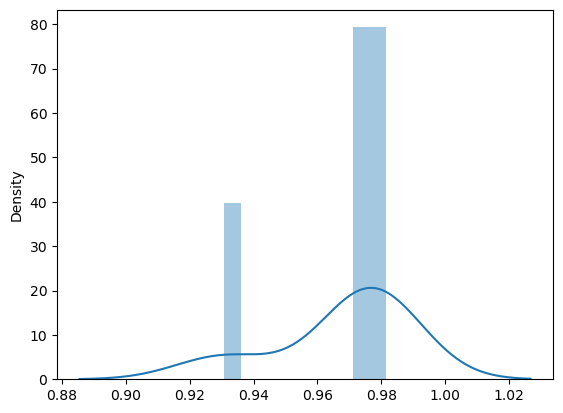

In [17]:
#Plotting the confidence interval
sns.distplot(scores, bins=10, kde=True)

In [18]:
#Getting the confidence interval
lower, upper = norm.interval(confidence=0.95, loc=np.mean(scores), scale=np.std(scores))
print('lower=%.3f, upper=%.3f' % (lower, upper))

lower=0.931, upper=1.004


In [19]:
#Getting the mean, standard deviation, minimum and maximum of the scores
np.mean(scores), np.std(scores), min(scores), max(scores)

(0.9676737343628001,
 0.018657295079136705,
 0.9308976747395294,
 0.9813358172911061)